In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn shap

  Using cached shap-0.50.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 2.0 MB/s  0:00:05m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.6 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.3 MB/s  0:00:02 eta 0:00:01
Using cached shap-0.50.0-cp313-cp313-macosx_11_0_arm64.whl (554 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# --- 1. Data Manipulation and Analysis ---
import pandas as pd
import numpy as np

# --- 2. Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Setting a clean visual style

# --- 3. Scikit-learn: Preprocessing and Modeling ---
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- 4. Evaluation Metrics and Tools ---
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score

# --- 5. Model Interpretability ---
import shap

# Configure pandas display options (optional, but helpful for viewing large dataframes)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner notebook output

print("All required libraries loaded successfully!")

All required libraries loaded successfully!


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# --- 1.2. Load the Raw .data File ---
file_name = 'german.data'

try:
    # Use the appropriate separator (sep=' ') for space-separated data.
    # header=None tells pandas there are no column names in the file itself.
    data = pd.read_csv(file_name, sep=' ', header=None)
    print(f"Dataset '{file_name}' loaded successfully!")
    print(f"Initial Data Shape: {data.shape[0]} rows and {data.shape[1]} columns.")
    print("\nInitial Head (Columns are numbered 0 to 20):")
    print(data.head())
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    data = pd.DataFrame()

Dataset 'german.data' loaded successfully!
Initial Data Shape: 1000 rows and 21 columns.

Initial Head (Columns are numbered 0 to 20):
    0   1    2    3     4    5    6   7    8     9   10    11  12    13    14  15    16  17    18    19  20
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101   4  A121  67  A143  A152   2  A173   1  A192  A201   1
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101   2  A121  22  A143  A152   1  A173   1  A191  A201   2
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101   3  A121  49  A143  A152   1  A172   2  A191  A201   1
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103   4  A122  45  A143  A153   1  A173   2  A191  A201   1
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101   4  A124  53  A143  A153   2  A173   2  A191  A201   2


In [6]:
# Standard column names for the German Credit Data (21 total columns)
column_names = [
    'Status_of_Existing_Checking_Account', 'Duration_in_months', 'Credit_History',
    'Purpose_of_Credit', 'Credit_Amount', 'Savings_Account_Bonds',
    'Present_Employment_Since', 'Installment_Rate_in_Percentage_of_Disposable_Income',
    'Personal_Status_and_Sex', 'Other_Debtors_Guarantors', 'Present_Residence_Since',
    'Property', 'Age_in_years', 'Other_Installment_Plans', 'Housing',
    'Number_of_Existing_Credits_at_this_Bank', 'Job',
    'Number_of_People_Being_Liable_to_Provide_Maintenance_for',
    'Telephone', 'Foreign_Worker', 'Risk' # The last column (index 20) is the Target
]

if not data.empty and data.shape[1] == 21:
    data.columns = column_names
    print("\nColumn names successfully applied.")
    
    # 2. Standardize the Target Variable (as done before)
    # The original 'Risk' column uses 1=Good and 2=Bad. We change it to 0=Good, 1=Bad.
    data.rename(columns={'Risk': 'Default'}, inplace=True) 
    data['Default'] = data['Default'].replace({1: 0, 2: 1})
    print("Target variable standardized to 'Default' (0=No Default, 1=Default).")
    
    # Final check
    print("\nCleaned Data Head:")
    print(data.head())
    print(data.info())


Column names successfully applied.
Target variable standardized to 'Default' (0=No Default, 1=Default).

Cleaned Data Head:
  Status_of_Existing_Checking_Account  Duration_in_months Credit_History Purpose_of_Credit  Credit_Amount Savings_Account_Bonds Present_Employment_Since  Installment_Rate_in_Percentage_of_Disposable_Income Personal_Status_and_Sex Other_Debtors_Guarantors  Present_Residence_Since Property  Age_in_years Other_Installment_Plans Housing  Number_of_Existing_Credits_at_this_Bank   Job  Number_of_People_Being_Liable_to_Provide_Maintenance_for Telephone Foreign_Worker  Default
0                                 A11                   6            A34               A43           1169                   A65                      A75                                                  4                       A93                     A101                        4     A121            67                    A143    A152                                        2  A173                    

In [7]:
# Separate features based on typical German Credit dataset structure
target_name = 'Default'

# Numerical (Continuous/Discrete) Features
numerical_features = [
    'Duration_in_months', 'Credit_Amount', 'Installment_Rate_in_Percentage_of_Disposable_Income',
    'Present_Residence_Since', 'Age_in_years', 'Number_of_Existing_Credits_at_this_Bank',
    'Number_of_People_Being_Liable_to_Provide_Maintenance_for'
]

# Categorical Features (Nominal/Ordinal)
categorical_features = data.drop(columns=numerical_features + [target_name]).columns.tolist()

print(f"Total Numerical Features: {len(numerical_features)}")
print(f"Total Categorical Features: {len(categorical_features)}")
print("\nDescriptive Statistics for Numerical Features:")
print(data[numerical_features].describe().T)

Total Numerical Features: 7
Total Categorical Features: 13

Descriptive Statistics for Numerical Features:
                                                     count      mean          std    min     25%     50%      75%      max
Duration_in_months                                  1000.0    20.903    12.058814    4.0    12.0    18.0    24.00     72.0
Credit_Amount                                       1000.0  3271.258  2822.736876  250.0  1365.5  2319.5  3972.25  18424.0
Installment_Rate_in_Percentage_of_Disposable_In...  1000.0     2.973     1.118715    1.0     2.0     3.0     4.00      4.0
Present_Residence_Since                             1000.0     2.845     1.103718    1.0     2.0     3.0     4.00      4.0
Age_in_years                                        1000.0    35.546    11.375469   19.0    27.0    33.0    42.00     75.0
Number_of_Existing_Credits_at_this_Bank             1000.0     1.407     0.577654    1.0     1.0     1.0     2.00      4.0
Number_of_People_Being_Liable_to

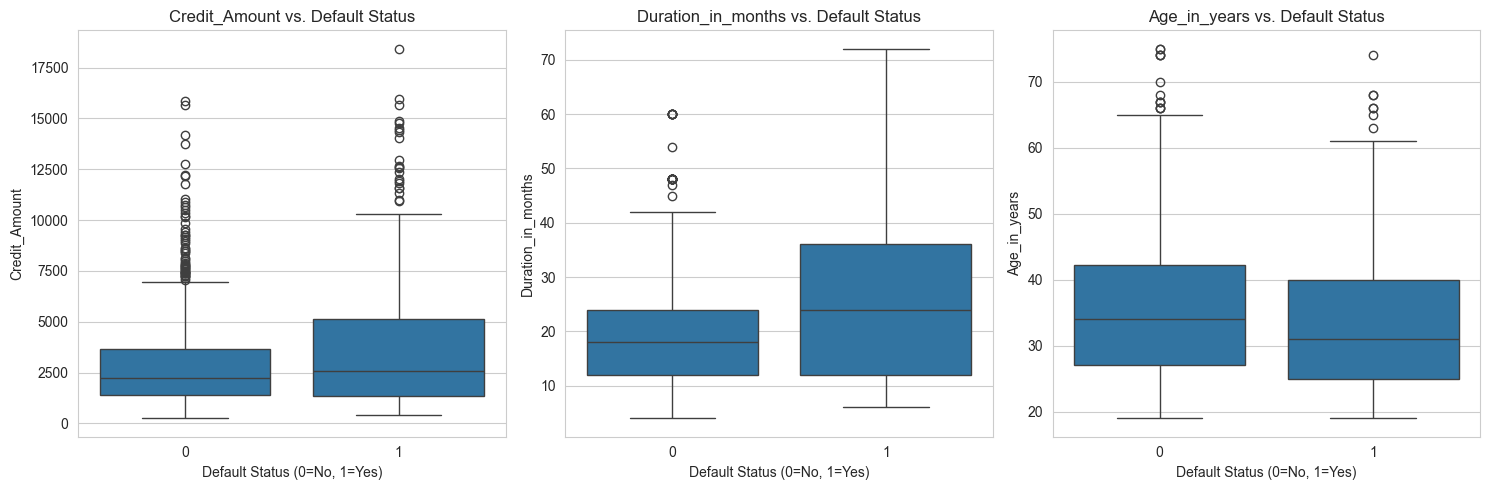

In [8]:
plt.figure(figsize=(15, 5))
key_num_features = ['Credit_Amount', 'Duration_in_months', 'Age_in_years']

for i, feature in enumerate(key_num_features):
    plt.subplot(1, 3, i + 1)
    # Use boxplot to show the difference in central tendency and spread
    sns.boxplot(x=target_name, y=feature, data=data)
    plt.title(f'{feature} vs. Default Status')
    plt.xlabel('Default Status (0=No, 1=Yes)')
    
plt.tight_layout()
plt.show()

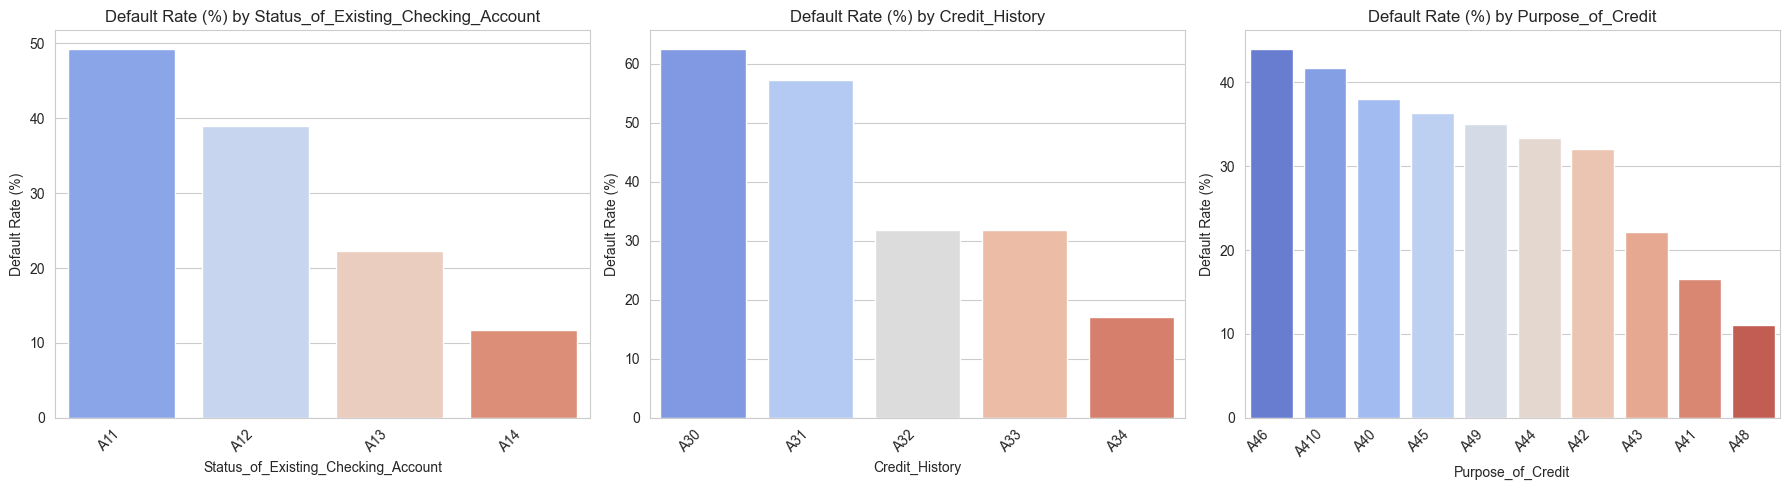

In [9]:
# Analyze the top 2-3 most important categorical features
key_cat_features = ['Status_of_Existing_Checking_Account', 'Credit_History', 'Purpose_of_Credit']

plt.figure(figsize=(18, 5))

for i, feature in enumerate(key_cat_features):
    plt.subplot(1, 3, i + 1)
    
    # Calculate the mean of the 'Default' (1) column for each category
    default_rate = data.groupby(feature)[target_name].mean().sort_values(ascending=False) * 100
    
    sns.barplot(x=default_rate.index, y=default_rate.values, palette='coolwarm')
    plt.title(f'Default Rate (%) by {feature}')
    plt.ylabel('Default Rate (%)')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# 1. Define Transformation Steps

# Numerical Pipeline: Impute missing values (if any) and then scale the data.
# Note: German data is usually clean, but we include imputing for robustness.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Strategy for missing values
    ('scaler', StandardScaler())                    # Scaling for Logistic Regression
])

# Categorical Pipeline: Impute missing values and then apply One-Hot Encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Strategy for missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Convert categories to binary features
])

# 2. Combine the Transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Drop any columns not specified
)

print("Preprocessing pipeline (ColumnTransformer) defined successfully.")

Preprocessing pipeline (ColumnTransformer) defined successfully.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Need to import SimpleImputer

# Separate features (X) from target (y)
X = data.drop(columns=[target_name])
y = data[target_name]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y) # stratify maintains class balance

print(f"\nOriginal Data Shape: {data.shape}")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Fit and transform the data using the Preprocessor
# X_train_processed is now ready for modeling
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nProcessed Training Data Shape: {X_train_processed.shape}")
print(f"Processed Test Data Shape: {X_test_processed.shape}")


Original Data Shape: (1000, 21)
Training Data Shape: (800, 20)
Testing Data Shape: (200, 20)

Processed Training Data Shape: (800, 61)
Processed Test Data Shape: (200, 61)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score # Ensure this is imported

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
log_reg_model.fit(X_train_processed, y_train)

# Predict probabilities on the test set (needed for ROC-AUC)
log_reg_probs = log_reg_model.predict_proba(X_test_processed)[:, 1]

# Calculate ROC-AUC score (This creates the variable log_reg_auc)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

print(f"✅ Logistic Regression ROC-AUC Score: {log_reg_auc:.4f}")

✅ Logistic Regression ROC-AUC Score: 0.8058


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, 
                                  random_state=42, class_weight='balanced')
rf_model.fit(X_train_processed, y_train)

# Predict probabilities on the test set
rf_probs = rf_model.predict_proba(X_test_processed)[:, 1]

# Calculate ROC-AUC score (This creates the variable rf_auc)
rf_auc = roc_auc_score(y_test, rf_probs)

print(f"✅ Random Forest ROC-AUC Score: {rf_auc:.4f}")

✅ Random Forest ROC-AUC Score: 0.7989


In [19]:
print("\n--- Model Comparison ---")
print(f"Logistic Regression AUC: {log_reg_auc:.4f}")
print(f"Random Forest AUC:       {rf_auc:.4f}")

if rf_auc > log_reg_auc:
    best_model = rf_model
    best_model_name = "Random Forest"
    best_probs = rf_probs
else:
    best_model = log_reg_model
    best_model_name = "Logistic Regression"
    best_probs = log_reg_probs

print(f"\n🏆 Best Model Selected: {best_model_name} (AUC: {best_probs.max():.4f})")


--- Model Comparison ---
Logistic Regression AUC: 0.8058
Random Forest AUC:       0.7989

🏆 Best Model Selected: Logistic Regression (AUC: 0.9663)


In [20]:
# Function to find the optimal threshold to balance Precision and Recall
# (Often, Recall is prioritized in credit risk to minimize False Negatives - missing a defaulter)
def evaluate_model_at_threshold(y_true, y_probs, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate key metrics
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"\n--- Evaluation at Threshold: {threshold:.2f} ---")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision (Avoid False Positives): {precision:.4f}")
    print(f"Recall (Capture True Positives/Defaulters): {recall:.4f}")
    
# Use the common 0.5 threshold first
evaluate_model_at_threshold(y_test, best_probs, threshold=0.5)

# Example: Using a lower threshold (e.g., 0.3) to prioritize finding more defaulters (higher Recall)
# This is a common strategy in credit risk management.
evaluate_model_at_threshold(y_test, best_probs, threshold=0.3)


--- Evaluation at Threshold: 0.50 ---
Confusion Matrix:
[[102  38]
 [ 12  48]]
Precision (Avoid False Positives): 0.5581
Recall (Capture True Positives/Defaulters): 0.8000

--- Evaluation at Threshold: 0.30 ---
Confusion Matrix:
[[68 72]
 [ 7 53]]
Precision (Avoid False Positives): 0.4240
Recall (Capture True Positives/Defaulters): 0.8833



Calculating SHAP values... This may take a moment.

--- SHAP Summary Plot (Global Feature Importance) ---


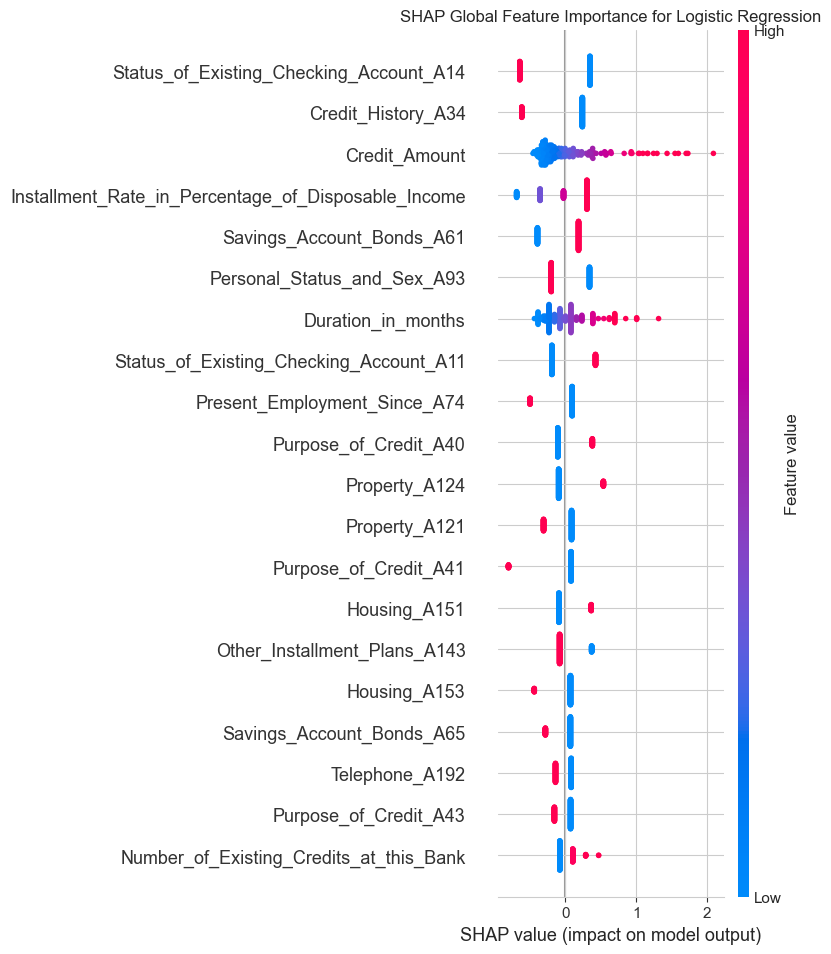


--- SHAP Bar Plot (Mean Absolute Impact) ---


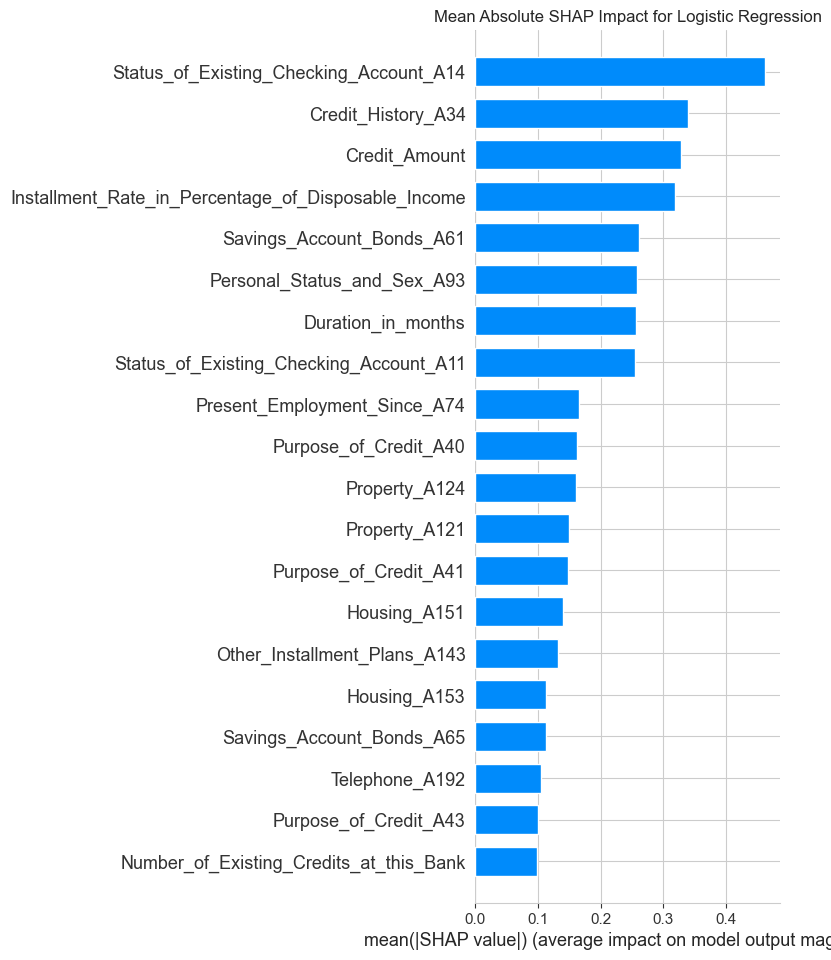

In [21]:
# Get the feature names after One-Hot Encoding
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# 1. Initialize the SHAP Explainer
# Use the trained model (best_model) and the processed test data (X_test_processed)
explainer = shap.Explainer(best_model, X_test_processed)

# 2. Compute SHAP values for the test set
# (Note: This step can take a few minutes for complex models like Random Forest)
print("\nCalculating SHAP values... This may take a moment.")
shap_values = explainer(X_test_processed)

# 3. Global Feature Importance Summary Plot
print("\n--- SHAP Summary Plot (Global Feature Importance) ---")
# Plot 1: Summary Plot showing average impact magnitude and direction
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, show=False)
plt.title(f"SHAP Global Feature Importance for {best_model_name}")
plt.show()

# Plot 2: Bar plot of mean absolute SHAP values
print("\n--- SHAP Bar Plot (Mean Absolute Impact) ---")
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, plot_type='bar', show=False)
plt.title(f"Mean Absolute SHAP Impact for {best_model_name}")
plt.show()